In [1]:
import datetime
from pathlib import Path
import pandas as pd


from app.services.data_io.loader.report_loader import ReportLoader
from app.services.data_io.unloader.legacy_excel_unload import LegacyExcelUnloader
from app.services.statistics.report_analytics import DailyAnalytics
from app.services.charts.charts import DailyChartPlotter

# ТЭК

ТЭК обработка 01.06.2024 - 12.06.2024

Ввоз - 274.55
Вывоз - 452.46

Кол-во рейсов ввоз - 41
Кол-во рейсов вывоз - 17

Среднесуточный ввоз - 284.34
Среднесуточный вывоз - 322.59

Среднесуточное кол-во рейсов (ввоз) - 40
Среднесуточное кол-во рейсов (вывоз) - 12

Предварительный остаток - 99.77


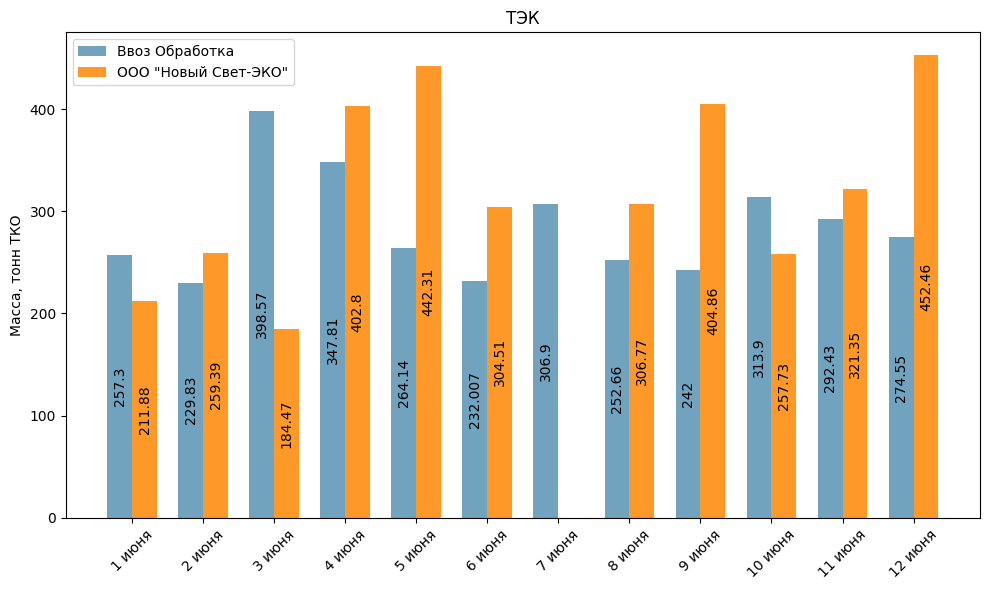

In [4]:
INPUT_PATH = r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13\ТЭК Отчет .xls"

OUTPUT_PATH = r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь\ТЭК обработка июнь.xlsx"

REPORT_NAME = "ТЭК"

filepath = INPUT_PATH
tek_report_import = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "processing"),("stream_direction", "import")],
)
tek_report_export = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "processing"),("stream_direction", "export")],
)

path_to_legacy = OUTPUT_PATH
unloader = LegacyExcelUnloader(
    tek_report_import.df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="import",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Ввоз",
)

unloader = LegacyExcelUnloader(
    tek_report_export.df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="export",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Вывоз",
)

joint_df = pd.concat([
    tek_report_import.df,
    tek_report_export.df
])

tek_analytics = DailyAnalytics(
    joint_df, initial_balance=236.2
)

print(tek_analytics.get_daily_formatted_analytics(
    # (datetime.datetime(2024, 6, 1), datetime.datetime(2024, 6, 3))
))


plotter = DailyChartPlotter(
    tek_report_import.df, tek_report_export.df
)
plotter.process_data(month=6)

import_palette = 'mako'
export_palette = 'YlOrBr'

plotter.create_double_bar_stacked_chart(
    title="ТЭК", ylabel='Масса, тонн ТКО',
    import_palette=import_palette, export_palette=export_palette
)

# ЭКОВАСТ


Парнас перегруз 01.06.2024 - 12.06.2024

Ввоз - 117.28
Вывоз - 115.4

Кол-во рейсов ввоз - 68
Кол-во рейсов вывоз - 5

Среднесуточный ввоз - 93.86
Среднесуточный вывоз - 105.68

Среднесуточное кол-во рейсов (ввоз) - 52
Среднесуточное кол-во рейсов (вывоз) - 5

Предварительный остаток - 380.0

Парнас обработка 01.06.2024 - 12.06.2024

Ввоз - 110.22
Вывоз - 102.76

Кол-во рейсов ввоз - 20
Кол-во рейсов вывоз - 5

Среднесуточный ввоз - 104.4
Среднесуточный вывоз - 93.66

Среднесуточное кол-во рейсов (ввоз) - 19
Среднесуточное кол-во рейсов (вывоз) - 4

Предварительный остаток - 128.83


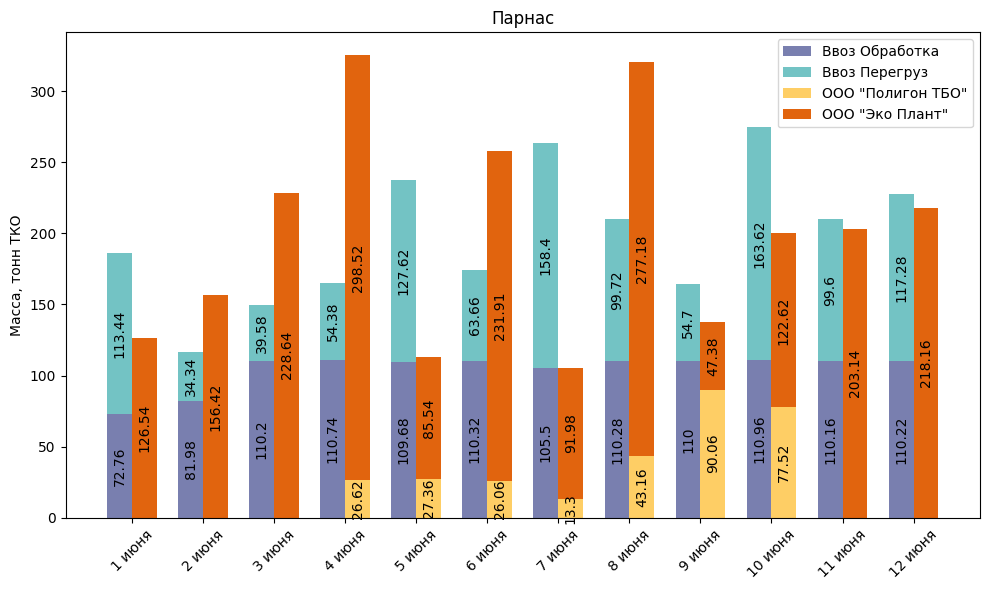


Софийская перегруз 01.06.2024 - 12.06.2024

Ввоз - 56.28
Вывоз - 146.58

Кол-во рейсов ввоз - 17
Кол-во рейсов вывоз - 5

Среднесуточный ввоз - 60.64
Среднесуточный вывоз - 101.46

Среднесуточное кол-во рейсов (ввоз) - 12
Среднесуточное кол-во рейсов (вывоз) - 4

Предварительный остаток - 58.56

Софийская обработка 01.06.2024 - 12.06.2024

Ввоз - 146.97
Вывоз - 134.8

Кол-во рейсов ввоз - 21
Кол-во рейсов вывоз - 5

Среднесуточный ввоз - 105.14
Среднесуточный вывоз - 124.14

Среднесуточное кол-во рейсов (ввоз) - 16
Среднесуточное кол-во рейсов (вывоз) - 4

Предварительный остаток - 144.42


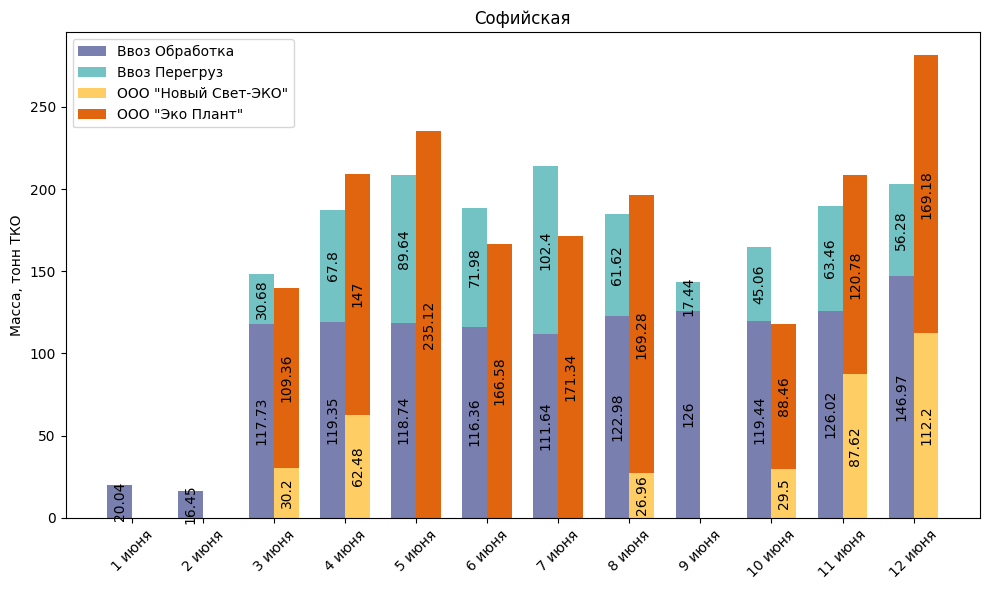


Рыбацкое перегруз 01.06.2024 - 12.06.2024

Ввоз - 52.54
Вывоз - 80.34

Кол-во рейсов ввоз - 6
Кол-во рейсов вывоз - 3

Среднесуточный ввоз - 54.21
Среднесуточный вывоз - 66.46

Среднесуточное кол-во рейсов (ввоз) - 7
Среднесуточное кол-во рейсов (вывоз) - 2

Предварительный остаток - 25.81

Рыбацкое обработка 01.06.2024 - 12.06.2024

Ввоз - 105.84
Вывоз - 110.84

Кол-во рейсов ввоз - 12
Кол-во рейсов вывоз - 4

Среднесуточный ввоз - 116.63
Среднесуточный вывоз - 104.18

Среднесуточное кол-во рейсов (ввоз) - 14
Среднесуточное кол-во рейсов (вывоз) - 4

Предварительный остаток - 149.42


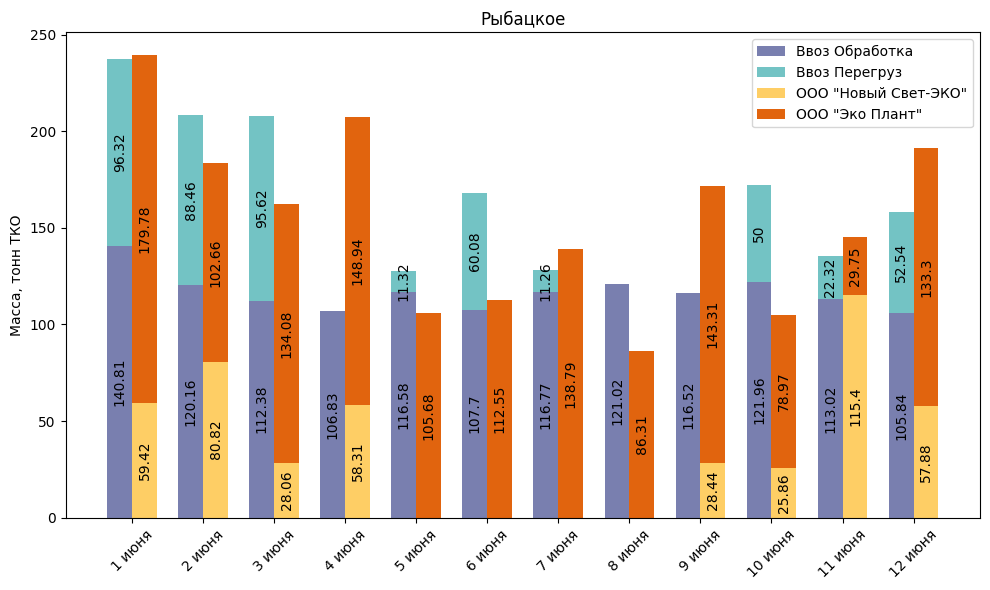

In [4]:
import_palette = 'mako'
export_palette = 'YlOrBr'

prefix_in = Path(r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13")
prefix_out = Path(r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь")

tranship_import_path = "ВВОЗ ТКО Перегруз.xlsx"
parnas_tranship_export_path = "ВЫВОЗ ТКО Парнас Перегруз.xlsx"
sofa_tranship_export_path = "ВЫВОЗ ТКО Софа Перегруз.xlsx"
ryba_tranship_export_path = "ВЫВОЗ ТКО Рыбацкое Перегруз.xlsx"

parnas_processing_import_path = "ВВОЗ ТКО Парнас ОБРАБОТКА.xlsx"
parnas_processing_export_path = "ВЫВОЗ ТКО Парнас ОБРАБОТКА.xlsx"
sofa_processing_import_path = "ВВОЗ ТКО Софийская ОБРАБОТКА.xlsx"
sofa_processing_export_path = "ВЫВОЗ ТКО Софа ОБРАБОТКА.xlsx"
ryba_processing_import_path = "ВВОЗ ТКО Рыбацкое ОБРАБОТКА.xlsx"
ryba_processing_export_path = "ВЫВОЗ ТКО Рыбацкое ОБРАБОТКА.xlsx"


parnas_tranship_output = "Парнас июнь.xlsx"
sofa_tranship_output = "Софийская июнь.xlsx"
ryba_tranship_output = "Рыбацкое июнь.xlsx"

parnas_processing_output = "Парнас обработка июнь.xlsx"
sofa_processing_output = "Софийская обработка июнь.xlsx"
ryba_processing_output = "Рыбацкое обработка июнь.xlsx"


workflows = [
    (
        ("Парнас", "tranship", 521.8),
        tranship_import_path,
        parnas_tranship_export_path,
        parnas_tranship_output
    ),
    (
        ("Парнас", "processing", 0),
        parnas_processing_import_path, parnas_processing_export_path, parnas_processing_output
    ),
    (
        ("Софийская", "tranship", 60.96),
        tranship_import_path, sofa_tranship_export_path, sofa_tranship_output
    ),
    (
        ("Софийская", "processing", 0),
        sofa_processing_import_path, sofa_processing_export_path, sofa_processing_output
    ),
    (
        ("Рыбацкое", "tranship", 136.03),
        tranship_import_path, ryba_tranship_export_path, ryba_tranship_output
    ),
    (
        ("Рыбацкое", "processing", 0),
        ryba_processing_import_path, ryba_processing_export_path, ryba_processing_output
    ),
]
import_report = None
export_report = None

for workflow in workflows:
    import_report_t = import_report
    export_report_t = export_report
    import_report = ReportLoader(
        prefix_in / workflow[1], [
            ("report_name", workflow[0][0]),
            ("stream_type", workflow[0][1]),
            ("stream_direction", "import"),
        ]
    )
    export_report = ReportLoader(
        prefix_in / workflow[2], [
            ("report_name", workflow[0][0]),
            ("stream_type", workflow[0][1]),
            ("stream_direction", "export"),
        ]
    )

    unloader = LegacyExcelUnloader(
        import_report.df,
        report_name=workflow[0][0],
        stream_type=workflow[0][1],
        stream_direction="import",
    )

    unloader.write_unsafe(
        prefix_out / workflow[3],
        sheet_name="Ввоз",
    )

    unloader = LegacyExcelUnloader(
        export_report.df,
        report_name=workflow[0][0],
        stream_type=workflow[0][1],
        stream_direction="export",
    )
    
    unloader.write_unsafe(
        prefix_out / workflow[3],
        sheet_name="Вывоз",
    )
    # print(workflow[0][0], workflow[0][1], "Done")
    print()

    joint_df = pd.concat([
        import_report.df,
        export_report.df
    ])
    analytics = DailyAnalytics(
        joint_df, initial_balance=workflow[0][2]
    )
    print(analytics.get_daily_formatted_analytics())

    if "processing" == workflow[0][1]:
        plotter = DailyChartPlotter(
            import_report.df, export_report.df,
            import_report_t.df, export_report_t.df
        )
        plotter.process_data(month=6)
        plotter.create_double_bar_stacked_chart(
            title=workflow[0][0], ylabel='Масса, тонн ТКО',
            import_palette=import_palette, export_palette=export_palette
        )


# 1 парк

Старообрядческая обработка 01.06.2024 - 12.06.2024

Ввоз - 285.16
Вывоз - 311.62

Кол-во рейсов ввоз - 159
Кол-во рейсов вывоз - 12

Среднесуточный ввоз - 263.64
Среднесуточный вывоз - 255.68

Среднесуточное кол-во рейсов (ввоз) - 135
Среднесуточное кол-во рейсов (вывоз) - 10

Предварительный остаток - 95.52


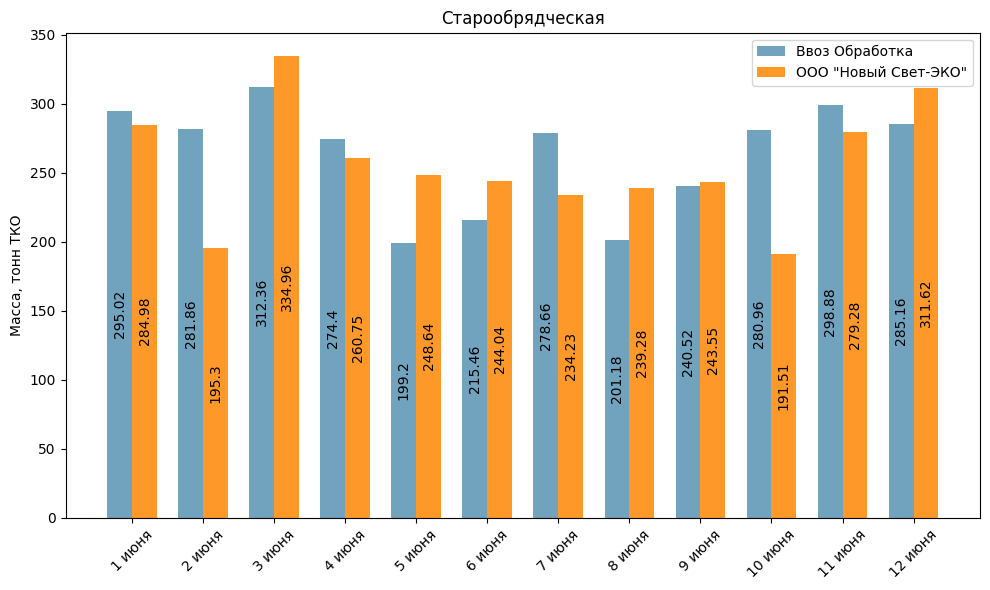

Предпортовый обработка 01.06.2024 - 12.06.2024

Ввоз - 227.54
Вывоз - 179.8

Кол-во рейсов ввоз - 160
Кол-во рейсов вывоз - 8

Среднесуточный ввоз - 273.56
Среднесуточный вывоз - 256.66

Среднесуточное кол-во рейсов (ввоз) - 165
Среднесуточное кол-во рейсов (вывоз) - 11

Предварительный остаток - 202.74


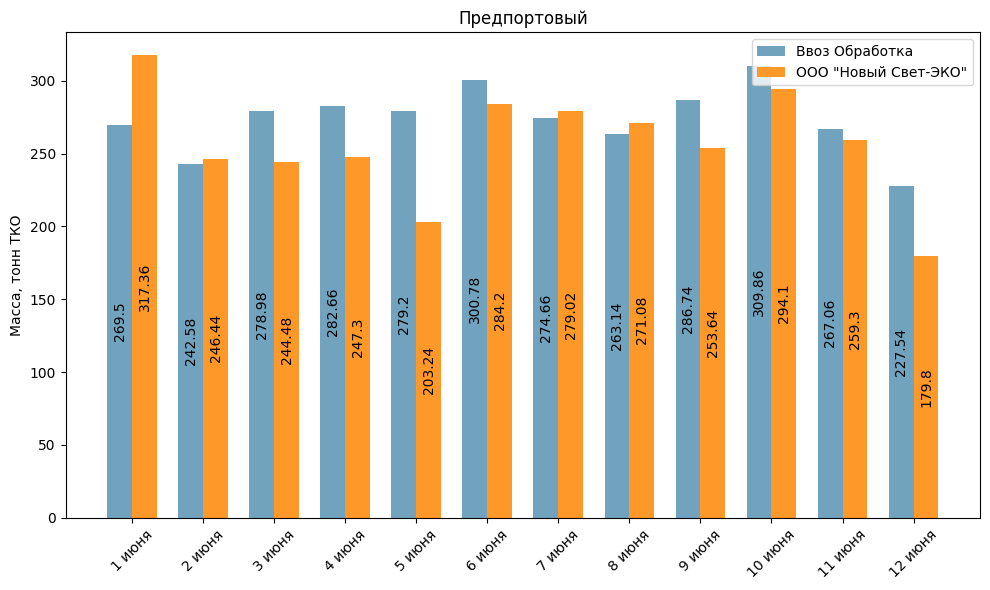

In [3]:
import_palette = 'mako'
export_palette = 'YlOrBr'

prefix_in = Path(r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13")
prefix_out = Path(r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь")

star_processing_import_path = "Отчет учета ТКО_Старообрядческая.xlsx"
star_processing_export_path = "Отчет учета остатков ТКО_Старообрядческая.xlsx"
port_processing_import_path = "Отчет учета ТКО_Новый Свет.ЭКО.xlsx"
port_processing_export_path = "Отчет учета остатков ТКО_Новый Свет.ЭКО.xlsx"

star_processing_output = "Старообрядческая обработка июнь.xlsx"
port_processing_output = "Предпортовый обработка июнь.xlsx"

workflows = [
    (
        ("Старообрядческая", "processing"),
        star_processing_import_path, star_processing_export_path, star_processing_output
    ),
    (
        ("Предпортовый", "processing"),
        port_processing_import_path, port_processing_export_path, port_processing_output
    ),
]

for workflow in workflows:
    import_report = ReportLoader(
        prefix_in / workflow[1], [
            ("report_name", workflow[0][0]),
            ("stream_type", workflow[0][1]),
            ("stream_direction", "import"),
        ],
    )
    export_report = ReportLoader(
        prefix_in / workflow[2], [
            ("report_name", workflow[0][0]),
            ("stream_type", workflow[0][1]),
            ("stream_direction", "export"),
        ],
    )

    unloader = LegacyExcelUnloader(
        import_report.df,
        report_name=workflow[0][0],
        stream_type=workflow[0][1],
        stream_direction="import",
    )
    unloader.write_unsafe(
        prefix_out / workflow[3],
        sheet_name="Ввоз",
    )

    unloader = LegacyExcelUnloader(
        export_report.df,
        report_name=workflow[0][0],
        stream_type=workflow[0][1],
        stream_direction="export",
    )
    unloader.write_unsafe(
        prefix_out / workflow[3],
        sheet_name="Вывоз",
    )

    # print(workflow[0][0], workflow[0][1], "Done")

    joint_df = pd.concat([
        import_report.df,
        export_report.df
    ])
    analytics = DailyAnalytics(
        joint_df, initial_balance=0
    )
    print(analytics.get_daily_formatted_analytics())

    if "processing" == workflow[0][1]:
        plotter = DailyChartPlotter(
            import_report.df, export_report.df,
        )
        plotter.process_data(month=6)
        plotter.create_double_bar_stacked_chart(
            title=workflow[0][0], ylabel='Масса, тонн ТКО',
            import_palette=import_palette, export_palette=export_palette
        )

# БТС

БТС перегруз 01.06.2024 - 12.06.2024

Ввоз - 545.85
Вывоз - 490.5

Кол-во рейсов ввоз - 95
Кол-во рейсов вывоз - 19

Среднесуточный ввоз - 603.37
Среднесуточный вывоз - 530.43

Среднесуточное кол-во рейсов (ввоз) - 113
Среднесуточное кол-во рейсов (вывоз) - 21

Предварительный остаток - 4025.2


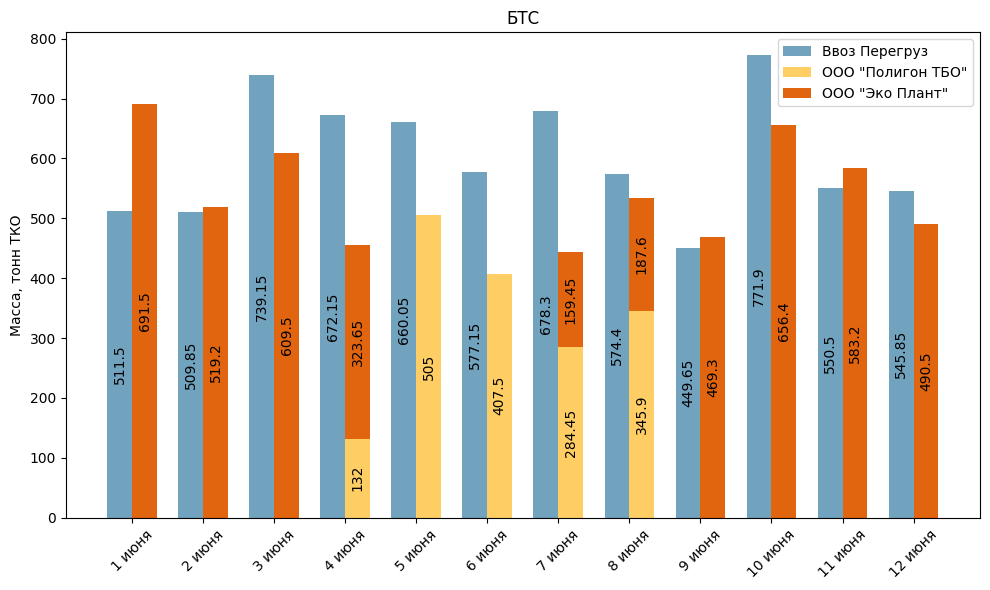

In [6]:
INPUT_PATH = r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13\БТС РЕЕСТР ВВОЗ-ВЫВОЗ 12.06.2024.xlsx"

OUTPUT_PATH = r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь\БТС июнь.xlsx"

REPORT_NAME = "БТС"

filepath = INPUT_PATH
tek_report_import = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "tranship"),("stream_direction", "import")],
)
tek_report_export = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "tranship"),("stream_direction", "export")],
)

path_to_legacy = OUTPUT_PATH
unloader = LegacyExcelUnloader(
    tek_report_import.df,
    report_name=REPORT_NAME,
    stream_type="tranship",
    stream_direction="import",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Ввоз",
)

unloader = LegacyExcelUnloader(
    tek_report_export.df,
    report_name=REPORT_NAME,
    stream_type="tranship",
    stream_direction="export",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Вывоз",
)

joint_df = pd.concat([
    tek_report_import.df,
    tek_report_export.df
])

tek_analytics = DailyAnalytics(
    joint_df, initial_balance=3149.9
)

print(tek_analytics.get_daily_formatted_analytics(
    # (datetime.datetime(2024, 6, 1), datetime.datetime(2024, 6, 3))
))


plotter = DailyChartPlotter(
    t_im_df=tek_report_import.df,
    t_ex_df=tek_report_export.df
)
plotter.process_data(month=6)

import_palette = 'mako'
export_palette = 'YlOrBr'

plotter.create_double_bar_stacked_chart(
    title=REPORT_NAME, ylabel='Масса, тонн ТКО',
    import_palette=import_palette, export_palette=export_palette
)

# Волхонка

Волхонка обработка 01.06.2024 - 12.06.2024

Ввоз - 569.75
Вывоз - 429.95

Кол-во рейсов ввоз - 82
Кол-во рейсов вывоз - 19

Среднесуточный ввоз - 545.62
Среднесуточный вывоз - 522.94

Среднесуточное кол-во рейсов (ввоз) - 72
Среднесуточное кол-во рейсов (вывоз) - 22

Предварительный остаток - 1194.25


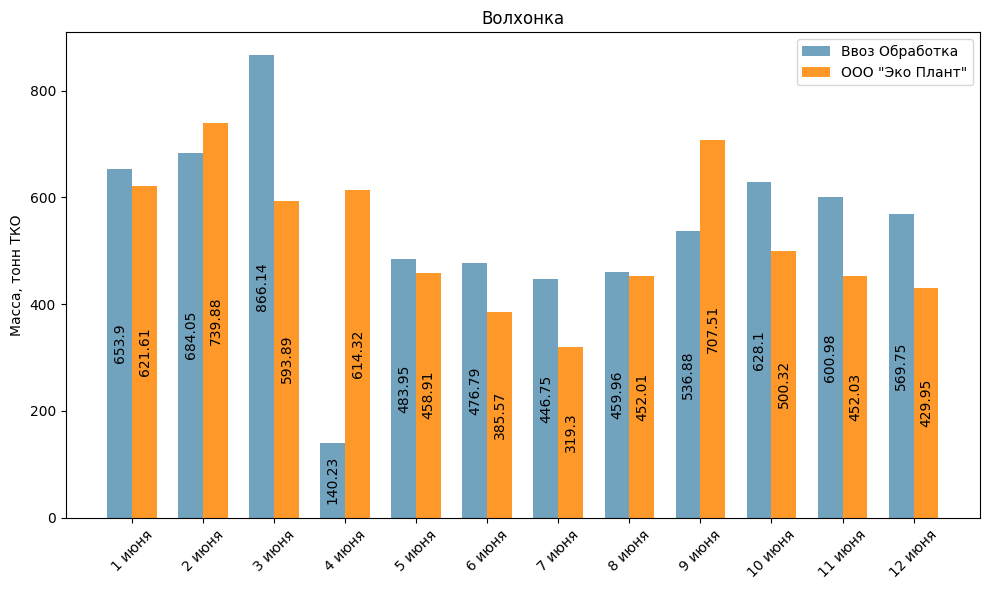

In [3]:
INPUT_PATH = r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13\на 12.06 Волхонка Реестр Весовая 2024.xlsx"

OUTPUT_PATH = r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь\Волхонка обработка июнь.xlsx"

REPORT_NAME = "Волхонка"

filepath = INPUT_PATH
tek_report_import = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "processing"),("stream_direction", "import")]
)
tek_report_export = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "processing"),("stream_direction", "export")]
)

path_to_legacy = OUTPUT_PATH
unloader = LegacyExcelUnloader(
    tek_report_import.df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="import",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Ввоз",
)

unloader = LegacyExcelUnloader(
    tek_report_export.df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="export",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Вывоз",
)

joint_df = pd.concat([
    tek_report_import.df,
    tek_report_export.df
])

tek_analytics = DailyAnalytics(
    joint_df, initial_balance=700 + 222.07
)

print(tek_analytics.get_daily_formatted_analytics(
    # (datetime.datetime(2024, 6, 1), datetime.datetime(2024, 6, 3))
))


plotter = DailyChartPlotter(
    tek_report_import.df, tek_report_export.df
)
plotter.process_data(month=6)

import_palette = 'mako'
export_palette = 'YlOrBr'

plotter.create_double_bar_stacked_chart(
    title=REPORT_NAME, ylabel='Масса, тонн ТКО',
    import_palette=import_palette, export_palette=export_palette
)

# Бронка

Бронка обработка 01.06.2024 - 12.06.2024

Ввоз - 282.25
Вывоз - 296.0

Кол-во рейсов ввоз - 58
Кол-во рейсов вывоз - 11

Среднесуточный ввоз - 403.86
Среднесуточный вывоз - 312.03

Среднесуточное кол-во рейсов (ввоз) - 76
Среднесуточное кол-во рейсов (вывоз) - 12

Предварительный остаток - 3706.55


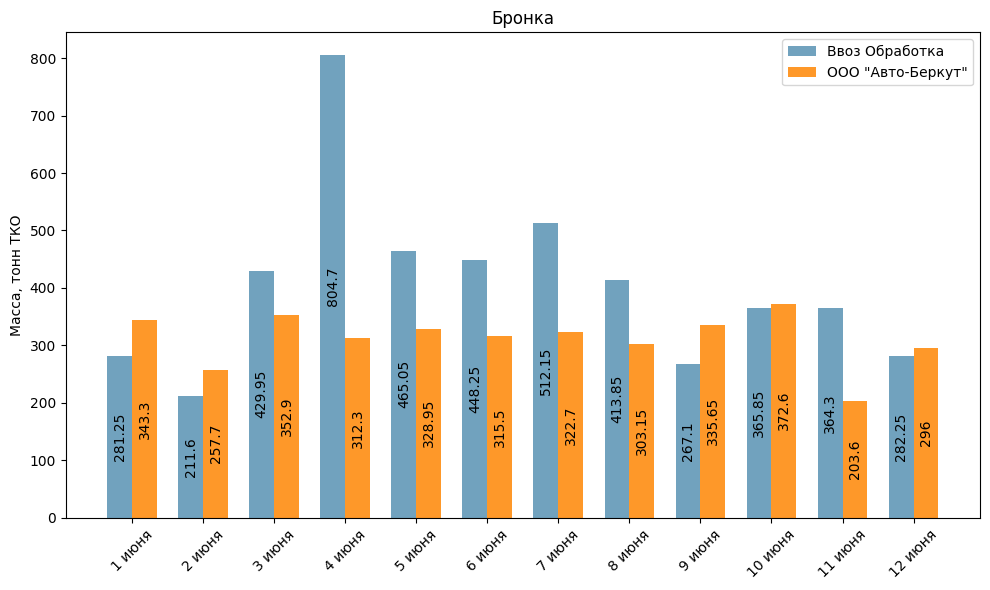

In [5]:
INPUT_PATH = r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13\Отчет ЭкоЛэнд ИЮНЬ_ввоз-вывоз с 01.06.2024 по 12.06.2024 .xlsx"

OUTPUT_PATH = r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь\Эко-Лэнд Бронка обработка июнь.xlsx"

REPORT_NAME = "Бронка"

filepath = INPUT_PATH
tek_report_import = ReportLoader(
    filepath, [("report_name", REPORT_NAME), ("stream_type", "processing"), ("stream_direction", "import")]
)
tek_report_export = ReportLoader(
    filepath, [("report_name", REPORT_NAME), ("stream_type", "processing"), ("stream_direction", "export")]
)

path_to_legacy = OUTPUT_PATH
unloader = LegacyExcelUnloader(
    tek_report_import.df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="import",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Ввоз",
)

unloader = LegacyExcelUnloader(
    tek_report_export.df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="export",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Вывоз",
)

joint_df = pd.concat([
    tek_report_import.df,
    tek_report_export.df
])

tek_analytics = DailyAnalytics(
    joint_df, initial_balance=2604.597
)

print(tek_analytics.get_daily_formatted_analytics(
    # (datetime.datetime(2024, 6, 1), datetime.datetime(2024, 6, 3))
))


plotter = DailyChartPlotter(
    tek_report_import.df,
    tek_report_export.df
)
plotter.process_data(month=6, only_till_yesterday=True)

import_palette = 'mako'
export_palette = 'YlOrBr'

plotter.create_double_bar_stacked_chart(
    title=REPORT_NAME, ylabel='Масса, тонн ТКО',
    import_palette=import_palette, export_palette=export_palette
)

# Ржевка

Ржевка перегруз 01.06.2024 - 12.06.2024

Ввоз - 302.34
Вывоз - 304.44

Кол-во рейсов ввоз - 110
Кол-во рейсов вывоз - 38

Среднесуточный ввоз - 344.56
Среднесуточный вывоз - 350.58

Среднесуточное кол-во рейсов (ввоз) - 105
Среднесуточное кол-во рейсов (вывоз) - 38

Предварительный остаток - 157.77


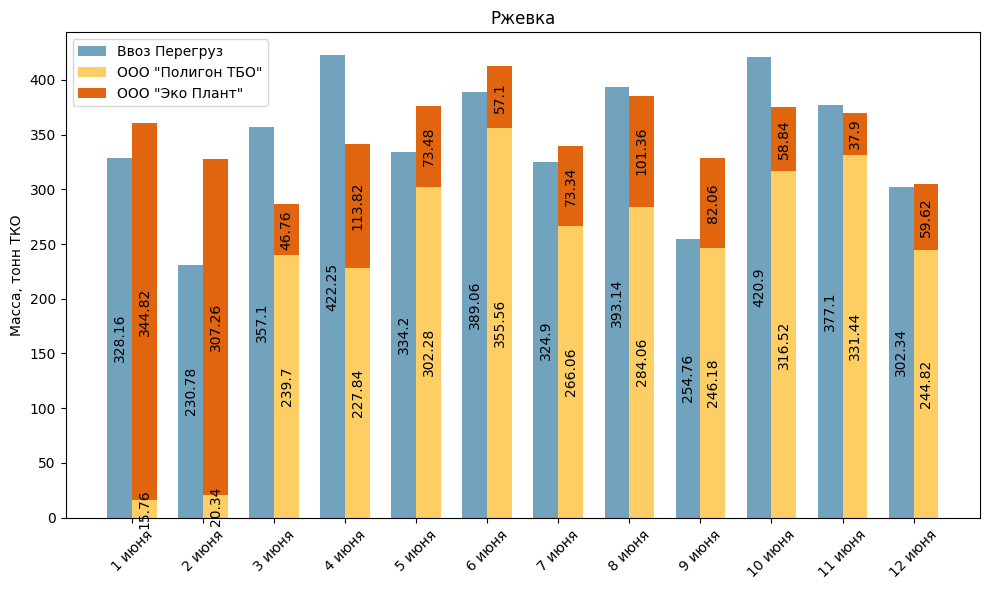

In [7]:
INPUT_PATH = r"Z:\Personal\Отчеты ввоз вывоз\Реестры площадок 2024.06.13\Ржевка Реестр ИЮНЬ.xlsx"

OUTPUT_PATH = r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь\Ржевка июнь.xlsx"

REPORT_NAME = "Ржевка"

filepath = INPUT_PATH
tek_report_import = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "tranship"),("stream_direction", "import")],
)
tek_report_export = ReportLoader(
    filepath, [("report_name", REPORT_NAME),("stream_type", "tranship"),("stream_direction", "export")],
)

path_to_legacy = OUTPUT_PATH
unloader = LegacyExcelUnloader(
    tek_report_import.df,
    report_name=REPORT_NAME,
    stream_type="tranship",
    stream_direction="import",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Ввоз",
)

unloader = LegacyExcelUnloader(
    tek_report_export.df,
    report_name=REPORT_NAME,
    stream_type="tranship",
    stream_direction="export",
)
unloader.write_unsafe(
    path_to_legacy,
    sheet_name="Вывоз",
)

joint_df = pd.concat([
    tek_report_import.df,
    tek_report_export.df
])

tek_analytics = DailyAnalytics(
    joint_df, initial_balance=230
)

print(tek_analytics.get_daily_formatted_analytics(
    # (datetime.datetime(2024, 6, 1), datetime.datetime(2024, 6, 3))
))


plotter = DailyChartPlotter(
    t_im_df=tek_report_import.df,
    t_ex_df=tek_report_export.df
)
plotter.process_data(month=6, only_till_yesterday=True)

import_palette = 'mako'
export_palette = 'YlOrBr'

plotter.create_double_bar_stacked_chart(
    title=REPORT_NAME, ylabel='Масса, тонн ТКО',
    import_palette=import_palette, export_palette=export_palette
)

# Грузовой

## Simple method

In [10]:
# BORKED

REPORT_NAME = "Грузовой"

NS = 434.5
EP = 205.15
date = datetime.datetime(2024, 6, 11)

df = pd.DataFrame(
    {"date": [date, date],
    "1": "", "2": "", "3": "", "4": "", "5": "", "6": "",
    "landfill": ["Новый Свет", "Эко Плант"],
    "weight": [NS, EP],
    "landfill_weight": [NS, EP]}
)

unloader = LegacyExcelUnloader(
    df,
    report_name=REPORT_NAME,
    stream_type="processing",
    stream_direction="export",
)
unloader.write_safe(
    r"Y:\Отдел аналитической работы\Сверка\2024\06. Июнь\Грузовой обработка июнь.xlsm",
    sheet_name="Вывоз",
)
